## ingrid in python

### 1. generate OPeNDAP URL in Data Catalog, then open

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

nc_url = "http://iridl.ldeo.columbia.edu/SOURCES/.WORLDBATH432/.bath/dods"
dsURL = xr.open_dataset(nc_url)

 - This is great, especially if URLs are short and simple
 - for anything complicated, this requires the Data Library to generate  
 - the default web encoding makes a mess (e.g., normal, square and curly brackets )
```
    the simple code:
      SOURCES .WORLDBATH432 .bath
      Y (60S) (60N) RANGEEDGES   
      
    inserts a mess into the URL:
    ... SOURCES/.WORLDBATH432/.bath/Y/%2860S%29%2860N%29RANGEEDGES
    
    actually this is no longer necessary and we could use:
    ... SOURCES/.WORLDBATH432/.bath/Y/(60S)/(60N)/RANGEEDGES
```

#### ...  so I use an alternate method in my python scripts:
### 2. write ingrid 'expert' code directly and pipe it to local ingrid executable
####  (works on byrd, kage, strega, snefru and many other local linux machines)

In [2]:
from subprocess import Popen, PIPE

# generate a multiline string containing the ingrid commands:
ingridcode = """
\\begin{ingrid}
SOURCES .WORLDBATH432 .bath
(bath.nc)writeCDF 
\\end{ingrid}
""" 

# and then pipe it to the ingrid executable:
p = Popen(['/usr/local/bin/ingrid'], stdin=PIPE, stdout=PIPE) 
ingridout, ingriderr = p.communicate(input=bytes(ingridcode, 'utf-8'))

# now there will be the netcdf file, 'bath.nc' in your local directory
nc_file = 'bath.nc'
dsCODE = xr.open_dataset(nc_file)

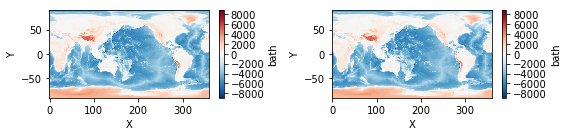

In [3]:
# to see that both give the same result:
plt.figure(figsize=(8,2))
plt.subplot(121)
dsURL.bath.plot()
plt.subplot(122)
dsCODE.bath.plot()
plt.tight_layout()

# and can check directly:
assert dsURL.equals(dsCODE)

### These commands are hard to remember, so I have written a python module:

In [4]:
# need to import the new command
import sys
sys.path.append("/net/carney/home/naomi/mymodules")
from ingrid.code import callIngrid

# so instead of the p = Popen(...) and the call to p.communicate:
callIngrid(ingridcode)

### Variable substitution example

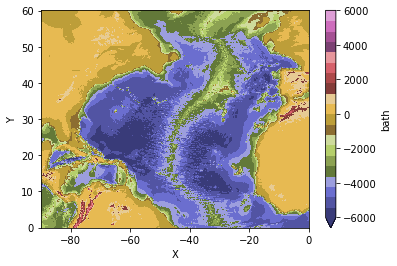

In [13]:
# Ingrid comments should begin with %% to avoid misinterpretation
# Variable substitution can be done a couple of ways, here is one:

var = 'bath'
file = 'bath-another.nc'

ingridcode = """
\\begin{ingrid}
SOURCES .WORLDBATH .%s
Y 0 60 RANGE X (90W) (0W) RANGE
(%s)writeCDF 
%%X Y fig: colors :fig .ps
\\end{ingrid}
"""  %(var, file)

callIngrid(ingridcode)
xr.open_dataset(file).bath.plot(cmap='tab20b',vmin=-6000,vmax=6000)